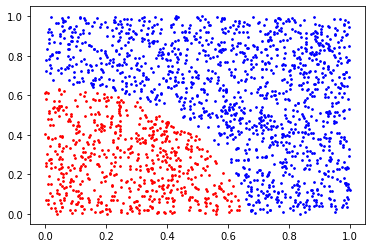

In [ ]:
# For generating and plotting the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dist = 0.66

X1 = np.random.random((2000,2))
X2 = [x for x in X1 if (x[0])**2 + (x[1])**2 > dist**2] # filter values that are to close to center

dist2 = 0.64
Y1 = np.random.random((2000,2))
Y2 = [x for x in X1 if (x[0])**2 + (x[1])**2 < dist2**2] # filter values that are to close to center

# for plotting
x = [x[0] for x in X2]
y = [y[1] for y in X2]

a = [x[0] for x in Y2]
b = [y[1] for y in Y2]
plt.scatter(x,y,c='b',s=3)
plt.scatter(a,b,c='r',s=3)
plt.show()

In [ ]:
x = np.array(x)
a = np.array(a)
o1 = np.ones(len(x))
y = np.array(y)
b = np.array(b)
o2 = -1*np.ones(len(a))
X1 = np.concatenate([x,a])
Y1 = np.concatenate([y,b])
Y_org = np.concatenate([o1,o2])
one = np.ones(len(X1))
X1.transpose()
Y1.transpose()
X_org = np.column_stack([X1, Y1,one])
print(Y_org)

[ 1.  1.  1. ... -1. -1. -1.]


In [ ]:
def relu(x):
    return(np.maximum(0, x))

In [ ]:
x_values = np.linspace(start = -2, stop = 2, num = 41)
print(x_values)
print(relu(x_values))

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5
 1.6 1.7 1.8 1.9 2. ]


In [ ]:
w2 = np.random.randn(5,)-0.5
w1 = np.random.randn(5,3)-0.5
b = np.random.randn(1)-0.5
print(w1,w2,b)

[[ 0.84180634  1.1794314  -0.66947476]
 [-0.03700335 -0.16589749 -0.39338018]
 [-1.29448209  1.18765525 -1.89141804]
 [-0.02512431  0.92609166  2.20396831]
 [ 0.18761675 -0.63797011 -0.00827361]] [-0.29320181 -0.98451082 -0.98769228 -1.01727586  0.02815088] [-0.25188438]


In [ ]:
def forward_pass(x,w1,w2,b):
    s1 = np.multiply(x,w1[0])
    s2 = np.multiply(x,w1[1])
    S1 = np.sum(np.multiply(w1,x),axis = 1)
    A1 = relu(S1)
    S2 = (np.multiply(w2,A1))
    A2 = np.sum(S2) + b
    # print(A2[0])
    return s1,s2,w1,w2,S1,A1,S2,A2


In [ ]:
x = np.array([1,2,3])
forward_pass(x,w1,w2,b)

(array([ 0.84180634,  2.3588628 , -2.00842429]),
 array([-0.03700335, -0.33179497, -1.18014055]),
 array([[ 0.84180634,  1.1794314 , -0.66947476],
        [-0.03700335, -0.16589749, -0.39338018],
        [-1.29448209,  1.18765525, -1.89141804],
        [-0.02512431,  0.92609166,  2.20396831],
        [ 0.18761675, -0.63797011, -0.00827361]]),
 array([-0.29320181, -0.98451082, -0.98769228, -1.01727586,  0.02815088]),
 array([ 1.19224486, -1.54893887, -4.59342573,  8.43896395, -1.1131443 ]),
 array([1.19224486, 0.        , 0.        , 8.43896395, 0.        ]),
 array([-0.34956834, -0.        , -0.        , -8.58475427,  0.        ]),
 array([-9.186207]))

In [ ]:
print(w2)
print(w2[1])

[-0.29320181 -0.98451082 -0.98769228 -1.01727586  0.02815088]
-0.9845108228287553


In [ ]:
def forward_pass(x,w1,w2,b):
    S1 = np.sum(np.multiply(w1,x),axis = 1)
    A1 = relu(S1)
    S2 = np.multiply(w2,A1)
    A2 = np.sum(S2) + b
    return S1,S2,A1,A2

In [ ]:
for i in range(X_org.shape[0]):
    S1,S2,A1,A2 = forward_pass(X_org[i],w1,w2,b)
    print(S2)

In [ ]:
print(X_org.shape[0])
print(w2.shape[0])

1967
5


In [ ]:
def backprop(X,Y,w1,w2,b,nb_epochs):
   for j in range(nb_epochs):
      count = 0 
      for i in range(X.shape[0]):
        S1,S2,A1,A2 = forward_pass(X[i],w1,w2,b)
        z = -1
        if A2[0] > 0 : 
          z = 1
        if (z*Y[i] < 1):
            b = b + 0.01*Y[i]
            # print(b)
            for k in range(5):
              w2[k] = w2[k] + 0.01*A1[k]*Y[i]
            for m in range(5):
              for n in range(3):
                if S1[m] > 0:
                  w1[m][n] = w1[m][n] + 0.01*Y[i]*A1[m]*X[i][n]
        else : count = count + 1
      if(j%5 == 0) :
        print(count/X.shape[0]) 
        # print(b)          
   return w1,w2,b


In [ ]:
print(Y_org)
# backprop(X_org,Y_org,w1,w2,b,100)

[ 1.  1.  1. ... -1. -1. -1.]


In [ ]:
print(X_org.shape[0])

1967


In [ ]:
# for i in range(X_org.shape[0]):
  # print(X_org[i])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_org,Y_org, test_size = 1/3, random_state = 0)

In [ ]:
w1,w2,b = backprop(X_train,Y_train,w1,w2,b,15)

0.7948131197559115
0.8993135011441648
0.8924485125858124


In [ ]:
Y_pred = np.array([])
for i in range(len(X_test)):
  S1,S2,A1,A2 = forward_pass(X_test[i],w1,w2,b)
  # print(S1)
  # print(A1)
  # if A2[0] > 0:
  #   Y_pred = np.concatenate([Y_pred,[1]])
  # else:
  #   Y_pred = np.concatenate([Y_pred,[-1]])

In [ ]:
print(Y_pred)

[]
